# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [11]:
data = pd.read_csv("weight-height.csv")
# display(data.tail(25))

male_df =  data.loc[data['Gender'] == 'Male'] ## .loc by string-index
female_df = data.loc[data['Gender'] == 'Female']


display(male_df.describe())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813

display(female_df.describe())
# Female Height mean: 63.708773603424916
# Female Height std: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight std: 19.022467805319007

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

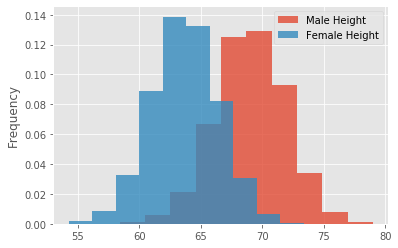

In [25]:
# Your code here
binsize = 10
overlap = 0.8
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = overlap, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = overlap, label = 'Female Height');
plt.legend()
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?
## Normal/gaussian Distribution for both
## Max(MaleHeight) > Max(Female Height) by 5.6 inches
## Avg(MaleHeight) > Avg(FemaleHeight) by 5.3 inches
## Range(MaleHeight) [20] > Range(FemaleHeight) [10]
## Similar StdDev

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

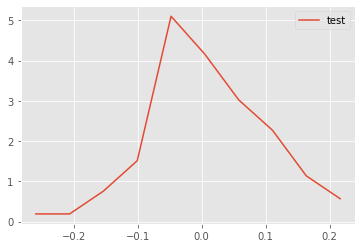

In [19]:
def density(variable):
    n, bins = np.histogram(variable, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy
   


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

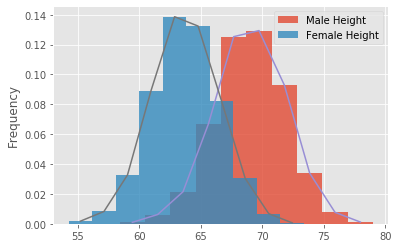

In [23]:
# Your code here 

## histograms from before
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.8, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.8, label = 'Female Height');
plt.legend()
## Density plot for Male Height
x,y = density(male_df.Height)
plt.plot(x,y)
## Density plot for Female Height
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

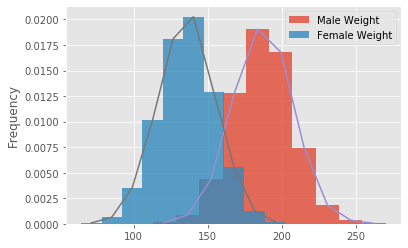

In [26]:
# Your code here, just copied and pasted, switching for weight
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.8, label ="Male Weight");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.8, label = 'Female Weight');
plt.legend()
## Density plot for Male Height
x,y = density(male_df.Weight)
plt.plot(x,y)
## Density plot for Female Height
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?

## Normal/gaussian Distribution for both
## Max(MaleWeight) > Max(FemaleWeight)by 67
## Avg(MaleWeight) > Avg(FemaleWeight) by 51
## Range(MaleWeight) [160] > Range(FemaleWeight)[140]
## Similar StdDev

# What is the takeaway when comparing male and female heights and weights?

## similar stdDev, normal distributions, male > female 
## smaller overlap between weights, easier to distinguish

## Repeat the above experiments in seaborn and compare with your results

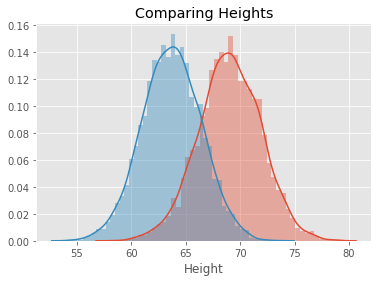

In [27]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

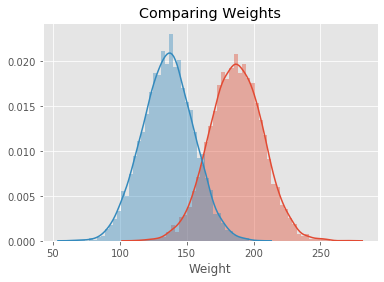

In [28]:
# Code for weights here
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Seaborn is just so much simpler...duh

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.